In [2]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*


!pip install category_encoders     ##매번 작업할때마다 설치해줘야한다...
!pip install -U pandas-profiling 
!pip install -U scikit-learn
from pandas_profiling import ProfileReport
from category_encoders import OneHotEncoder
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OrdinalEncoder #float type을 제외한 다른 타입 전부 변환 *사용주의*
from sklearn.feature_selection import f_regression, SelectKBest
from scipy.stats import randint, uniform

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore') # (참고) warning 제거를 위한 코드


from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve


# https://dacon.io/codeshare/2781?dtype=recent
# 시간별 특성의 추이를 시각화를 통해 직관적으로 알아보기
#필요한 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline 


if platform.system() == 'Windows':
    font_name = font_manager.FontPropertise(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus']=False

*웹크롤링으로 rarity 사이트에서 각 nft 아이템들의 실시간 랭킹 정보를 바탕으로 새로운  특성을 만들고 이 특성이 해당 모델의 가격 예측에 영향을 줄지 고려해볼 것*

미래의 특정 기간에서의 이더리움 가격을 예측 해보고자하는 머신러닝 모델이다. 시계열 데이터의 활용방법에대한 지식이 필요.
데이터 전처리, 이상치 제거, 테이블 병합 및 특성공학 요구 됨(예측결과에 영향을 미치는 특성들을 최종적으로 준비하기 전까지의 작업과정).
평가지표 (metric) 에 맞는 모델링 그리고 그 해석이 필요시 됨.
도메인에 대한 이해와 해당 데이터들을 분석하는 역량이 필요할 뿐만 아니라 이에 대한 설명력도 요구 됨. 시각화 하여 설명력을 높일 수 있을 것임.

데이터에 대한 이해를 설명해주기 위해 시각화까지 사용하여 요구되어진 문제 해결을 위한 예측 모델을 최종적으로 만든다.

이후,
실시간으로 쌓이는 새로운 데이터들을 수집하고 -> 모델에 자동으로 학습하여 -> 이를 배포하여 고객에게까지 서빙하는 일련의 작업까지의 파이프라인 구축능력 요구됨.
(이를 위한 여러 툴들의 사용법과 이해도 및 최적화를 위한 고려도 필요) 

In [3]:
!pip install jsonlines
import pandas as pd # pandas 모듈 로드
import json  # json 모듈 로드
import jsonlines
from collections import OrderedDict

In [4]:
with open ("/content/meebits_financial_events.jsonl", "r") as t:
    meebits_datas = json.load(t) ## load가 아닌 loads 함수를 사용 
                         # data = json.loads(json_str)

In [5]:
with open('/content/meebits_item_metadata.jsonl') as k:
  k_update = json.load(k, object_pairs_hook=OrderedDict)

In [6]:
ku = list(k_update)
ku

['item_id', 'trait_type', 'trait_value']

In [7]:
item_id = [k_update[ku[0]][str(j)] for j in range(len(list(k_update[ku[0]])))]
trait_type = [k_update[ku[1]][str(j)] for j in range(len(list(k_update[ku[1]])))]
trait_value = [k_update[ku[2]][str(j)] for j in range(len(list(k_update[ku[2]])))]

In [8]:
meta_df=pd.DataFrame({"item_id":item_id,
                    "trait_type":trait_type,
                    "trait_value":trait_value})

In [9]:
with open('/content/eth_exchange_rates.jsonl') as f:
  d_update = json.load(f, object_pairs_hook=OrderedDict)
# 해당 jsonl 파일을 OrderedDict를 활용하여 순차적으로 정렬(시간의 순차적 기준을 맞춰주어 데이터를 모델링할 때 활용하기 위해)
# 출처: https://engineer-mole.tistory.com/195 [매일 꾸준히, 더 깊이]

In [10]:
leo = list(d_update)
leo

['block_date', 'eth_price']

In [11]:
block_date = [d_update[leo[0]][str(j)] for j in range(len(list(d_update[leo[0]])))]
eth_price = [d_update[leo[1]][str(j)] for j in range(len(list(d_update[leo[1]])))]

In [12]:
rate_df=pd.DataFrame({"block_date":block_date,
                    "eth_price":eth_price})

In [13]:
features = list(meebits_datas)
features

['item_id',
 'buyer_id',
 'seller_id',
 'block_timestamp',
 'transaction_hash',
 'amount',
 'sold_price_eth',
 'sold_price_usd']

In [14]:
item_id = [meebits_datas[features[0]][str(j)] for j in range(len(list(meebits_datas[features[0]])))]
buyer_id = [meebits_datas[features[1]][str(j)] for j in range(len(list(meebits_datas[features[1]])))]
seller_id = [meebits_datas[features[2]][str(j)] for j in range(len(list(meebits_datas[features[2]])))]
block_timestamp = [meebits_datas[features[3]][str(j)] for j in range(len(list(meebits_datas[features[3]])))]
transaction_hash = [meebits_datas[features[4]][str(j)] for j in range(len(list(meebits_datas[features[4]])))]
amount = [meebits_datas[features[5]][str(j)] for j in range(len(list(meebits_datas[features[5]])))]
sold_price_eth = [meebits_datas[features[6]][str(j)] for j in range(len(list(meebits_datas[features[6]])))]
sold_price_usd = [meebits_datas[features[7]][str(j)] for j in range(len(list(meebits_datas[features[7]])))]
# feature별로 각 객체에 할당


In [15]:
event_df = pd.DataFrame({"item_id":item_id,
                    "buyer_id":buyer_id,
                    "seller_id":seller_id,
                    "block_timestamp":block_timestamp,
                    "transaction_hash":transaction_hash,
                    "amount":amount,
                    "sold_price_eth":sold_price_eth,
                    "sold_price_usd":sold_price_usd})

In [16]:
event_df.head(5) # 데이터프레임화 한 후 샘플 5개 미리보기

,item_id,buyer_id,seller_id,block_timestamp,transaction_hash,amount,sold_price_eth,sold_price_usd
0,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_312,0x2643796cb6b4e715140f09c352ea26afff1a7d93,0x46e449a3f88d0e35b4520bc36e8dfda195c896b0,2021-05-03 22:46:47+00:00,0x982217c43559c30aeb102a8305e7c2bfd1d3b464d149...,1.0,2.0,5906.594696
1,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_9991,0x752cdfdffaeebe73bb1388f69f94553ade64c988,0xdcf227c475a43c82a4ffeb133729d6ce2f348a92,2021-05-05 18:33:25+00:00,0xcedfdb84b0a800ac82d8a508c5f7c671c933c2c48852...,1.0,2.0,6491.326298
2,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_6684,0x51a528da1083ba23943ba2092ee2a278c8715779,0x6611fe71c233e4e7510b2795c242c9a57790b376,2021-08-02 00:07:43+00:00,0x0a1fa9ea68add5a19d019e15564ce27d61153515ae12...,1.0,2.0,5110.816357
3,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_18024,0xd6594066cac22ce062c60350118f68742523027d,0xdb3ccd266ed8f6e0f7f789b1dd7dd504e9c8d72c,2021-07-19 05:44:08+00:00,0xadcf8afbcfbdd8a5d75daa0d4561f5ded1ef6c82e1c6...,1.0,2.0,3803.469098
4,0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_9533,0x268d3a8c4701000546dd0bf959bf6c8956cc3e5e,0x600c33790df27499f094b181124df8358c4d41aa,2021-08-01 21:28:32+00:00,0xfca385350d13844033e2fcf05844241b82b0899c0ba0...,1.0,2.0,5083.349199


In [17]:
print(rate_df)
print(meta_df)
print(event_df)
# 세가지 데이터를 데이터프레임화 한 후 확인

                    block_date    eth_price
0    2021-05-03 00:00:00+00:00  2776.703712
1    2021-05-04 00:00:00+00:00  2944.916947
2    2021-05-05 00:00:00+00:00  2953.297348
3    2021-05-06 00:00:00+00:00  3439.855070
4    2021-05-07 00:00:00+00:00  3245.663149
..                         ...          ...
280  2022-02-07 00:00:00+00:00  2993.099440
281  2022-02-08 00:00:00+00:00  3018.673398
282  2022-02-09 00:00:00+00:00  3062.805808
283  2022-02-10 00:00:00+00:00  3149.953286
284  2022-02-11 00:00:00+00:00  3127.438107

[285 rows x 2 columns]
                                                 item_id  trait_type  \
0       0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_10017  Hair Style   
1       0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_10033     Earring   
2       0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_10048        Type   
3       0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_10144  Hair Style   
4       0x7bd29408f11d2bfc23c34f18275bbf23bb716bc7_10170  Hair Color   
...             

In [18]:
meta = meta_df.copy()
meta['item_id'] = meta['item_id'].apply(lambda dt: dt[43:])
meta['item_id'] = meta['item_id'].astype(int)

In [19]:
meta['trait_type'].unique()

array(['Hair Style', 'Earring', 'Type', 'Hair Color', 'Pants', 'Shirt',
       'Shoes', 'Shirt Color', 'Pants Color', 'Hat', 'Beard',
       'Tattoo Motif', 'Overshirt', 'Glasses', 'Jersey Number',
       'Beard Color', 'Overshirt Color', 'Shoes Color', 'Hat Color',
       'Glasses Color', 'Necklace'], dtype=object)

In [20]:
meta = meta[~meta['trait_type'].isin(['Tattoo Motif'])]#타투 모티브는 특성에 적합하지 않은 이상치라고 판단하여 제거
meta['trait_value'].value_counts()

Human          18881
Dark           15050
Black           8036
Gray            7260
White           6957
               ...  
LL Alien          13
Glyph Shirt        6
Dissected          5
None               5
No Shoes           2
Name: trait_value, Length: 171, dtype: int64

In [21]:
meta.shape

(200396, 3)

In [24]:
event = event_df.copy()

event['date'] = event['block_timestamp'] 
event['date'] = event['date'].apply(lambda dt: dt[0:10])

event['item_id'] = event['item_id'].apply(lambda dt: dt[43:])
event['item_id'] = event['item_id'].astype(int)
event_id = event
event['block_timestamp']=pd.to_datetime(event['block_timestamp'])
event = event.sort_values(by='block_timestamp').drop_duplicates(['item_id'], keep='last') # 가장 최근 거래되어진 각 고유 아이템의 거래 가격 데이터만 남겨둔다.

In [25]:
len(event['item_id'])

11974

In [26]:
meta

,item_id,trait_type,trait_value
0,10017,Hair Style,Messy
1,10033,Earring,Gold Earring
2,10048,Type,Pig
3,10144,Hair Style,Curly
4,10170,Hair Color,Bleached
...,...,...,...
201385,6369,Shirt,Oversized Hoodie
201386,6895,Shirt,Oversized Hoodie
201387,929,Shirt,Oversized Hoodie
201388,953,Shirt,Oversized Hoodie


In [27]:
len(meta['trait_type'].unique())

20

In [28]:
# 파라미터에 대한 설명
# index: unique identifier
# columns: "wide" 데이터에서 column별로 다르게 하고자 하는 값.
# values: 결과값이 들어가는 곳 (wide 데이터프레임의 내용에 들어갈 값)
wide = meta.pivot(index = 'item_id', columns = 'trait_type', values = 'trait_value')
meta = wide.reset_index()

In [39]:
df = df.set_index('item_id')

In [40]:
# 가격 예측에 사용할 특성들과 타겟특성을 확인합니다.
features = ['Beard', 'Beard Color', 'Earring', 'Glasses', 'Glasses Color',
       'Hair Color', 'Hair Style', 'Hat', 'Hat Color', 'Jersey Number',
       'Necklace', 'Overshirt', 'Overshirt Color', 'Pants', 'Pants Color',
       'Shirt', 'Shirt Color', 'Shoes', 'Shoes Color', 'Type']

target = 'sold_price_eth' #

In [51]:
arima_df = pd.merge(event_id, meta, on='item_id', how='left')

In [52]:
arima_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31545 entries, 0 to 31544
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   item_id           31545 non-null  int64              
 1   buyer_id          31545 non-null  object             
 2   seller_id         31545 non-null  object             
 3   block_timestamp   31545 non-null  datetime64[ns, UTC]
 4   transaction_hash  31545 non-null  object             
 5   amount            31545 non-null  float64            
 6   sold_price_eth    31545 non-null  float64            
 7   sold_price_usd    31545 non-null  float64            
 8   date              31545 non-null  object             
 9   Beard             6283 non-null   object             
 10  Beard Color       6156 non-null   object             
 11  Earring           3419 non-null   object             
 12  Glasses           12937 non-null  object             
 13  G

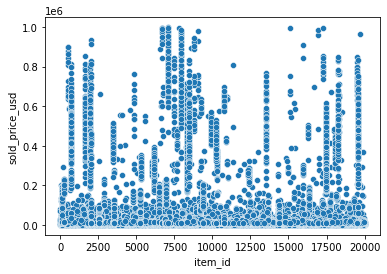

In [77]:
# arima_df['sold_price_usd'].plot.hist();
arima_df = arima_df.loc[(arima_df['sold_price_usd'] > 1) & (arima_df['sold_price_usd'] < 1000000)]#가격이 상승폭이 너무 크거나 다른 아이템들과 비교하여 가격이 너무 높거나 낮은 아이템들을 필터링 해줍니다.
# arima_df = arima_df.loc[(arima_df['sold_price_eth'] > 0.001) & (arima_df['sold_price_eth'] < 8000)] #이상치 제거
arima_df['sold_price_usd'] = arima_df['sold_price_usd'].astype(int)##############소수점이하는 큰 의미가 없으므로 조금 더 유리한 학습을 위해 정수화해줍니다.
sns.scatterplot(x = 'item_id', y = 'sold_price_usd', data = arima_df)
# sns.displot(arima_df['sold_price_usd'])

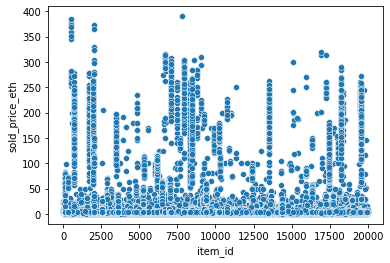

In [78]:
sns.scatterplot(x = 'item_id', y = 'sold_price_eth', data = arima_df)#이더리움의 이상치를 확인합니다.

In [80]:


df = arima_df.sort_values(by='block_timestamp')
df = df.fillna(0)
x = df[features]

y = df['sold_price_usd']
encoder = TargetEncoder()
x = encoder.fit_transform(x, y)
x['sold_price_usd'] = df['sold_price_usd']
df = x

print(df)

              Beard   Beard Color       Earring       Glasses  Glasses Color  \
2525   54445.721627  54282.543268  53130.368622  21227.192661   56034.867086   
85     54445.721627  54282.543268  53130.368622  41160.271441   56034.867086   
84     54445.721627  54282.543268  53130.368622  41160.271441   56034.867086   
83     54445.721627  54282.543268  53130.368622  41160.271441   56034.867086   
82     54445.721627  54282.543268  53130.368622  26197.298865   31109.658288   
...             ...           ...           ...           ...            ...   
23016  54445.721627  54282.543268  12409.250988  79353.940938   56034.867086   
23040  54445.721627  54282.543268  53130.368622  41160.271441   56034.867086   
23070  54445.721627  54282.543268  26499.668313  41160.271441   56034.867086   
23041  54445.721627  54282.543268  53130.368622  26197.298865   31109.658288   
23027  54445.721627  54282.543268  53130.368622  50473.896893   42318.398143   

         Hair Color    Hair Style      

Epoch : 0, loss : 0.00957
Epoch : 200, loss : 0.00077
Epoch : 400, loss : 0.00076
Epoch : 600, loss : 0.00064
Epoch : 800, loss : 0.00063
Epoch : 1000, loss : 0.00062
Epoch : 1200, loss : 0.00061
Epoch : 1400, loss : 0.00061


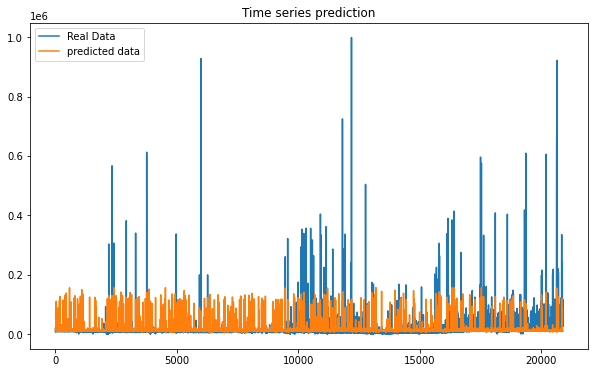

In [98]:
import numpy as np 

import pandas as pd

import pandas_datareader.data as pdr

import matplotlib.pyplot as plt

import datetime

import torch

import torch.nn as nn

from torch.autograd import Variable

import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# GPU setting

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#print(torch.cuda.get_device_name(0)) #Google colab = TESLA T4

 

# Training/Test ratio = 7:3

Train_ratio = 0.7

Test_ratio = 0.3

 

# Data slicing

x = df.iloc[:,0:-1]

y = df.iloc[:,-1:]

 

# Data Division

train_x = x.iloc[0:int(len(df)*Train_ratio),:]

train_y = y.iloc[0:int(len(df)*Train_ratio),:]

test_x = x.iloc[int(len(df)*Train_ratio):,:]

test_y = y.iloc[int(len(df)*Train_ratio):,:]

 

# Normalizing , 둘다 학습하여 성능비교할것

minmax = MinMaxScaler()

standard = StandardScaler()

 

train_x = minmax.fit_transform(train_x)

train_y = minmax.fit_transform(train_y)

test_x = minmax.fit_transform(test_x)

test_y = minmax.fit_transform(test_y)

 

# Check Data pre-processing

#print("Training shape : ", train_x.shape, train_y.shape)

#print("Test shape : ",test_x.shape, test_y.shape)

 

# Numpy array상태로는 학습이 불가능하므로, Torch Variable 형태로 변경(data/grad/grad_fn)

train_x_tensor = Variable(torch.Tensor(train_x))

train_y_tensor = Variable(torch.Tensor(train_y))

#print("After torch variable shape_Train : ",train_x_tensor.shape, train_y.shape)

 

test_x_tensor = Variable(torch.Tensor(test_x))

test_y_tensor = Variable(torch.Tensor(test_y))

#print("After torch Variable shape_Test : ",test_x_tensor.shape, test_y_tensor.shape)

 

train_x_tensor_final = torch.reshape(train_x_tensor, (train_x_tensor.shape[0], 1, train_x_tensor.shape[1]))

train_y_tensor_final = torch.reshape(train_y_tensor, (train_y_tensor.shape[0], 1, train_y_tensor.shape[1]))

test_x_tensor_final = torch.reshape(test_x_tensor, (test_x_tensor.shape[0], 1, test_x_tensor.shape[1]))

test_y_tensor_final = torch.reshape(test_y_tensor,(test_y_tensor.shape[0], 1, test_y_tensor.shape[1]) )

#print(train_x_tensor_final.shape, test_x_tensor_final.shape)

 

# LSTM network modeling

class LSTM_Jun(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) : 

        super(LSTM_Jun, self).__init__()

        self.num_classes = num_classes

        self.num_layers = num_layers

        self.input_size = input_size

        self.hidden_size = hidden_size

        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)

        self.layer_1 = nn.Linear(hidden_size, 256)

        self.layer_2 = nn.Linear(256,256)

        self.layer_3 = nn.Linear(256,128)

        self.layer_out = nn.Linear(128, num_classes)

        self.relu = nn.ReLU() #Activation Func

 

    def forward(self,x):

        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Hidden State

        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #Internal Process States

 

        output, (hn, cn) = self.lstm(x, (h_0, c_0))

 

        hn = hn.view(-1, self.hidden_size) # Reshaping the data for starting LSTM network

        out = self.relu(hn) #pre-processing for first layer

        out = self.layer_1(out) # first layer

        out = self.relu(out) # activation func relu

        out = self.layer_2(out)

        out = self.relu(out)

        out = self.layer_3(out)

        out = self.relu(out)

        out = self.layer_out(out) #Output layer

        return out

 

# Code Main

num_epochs = 1600   #10000

learning_rate = 0.001

input_size = int(len(x.columns))

hidden_size = 2 # number of features in hidden state

num_layers = 1

num_classes = int(len(y.columns))

 

LSTM_Jun = LSTM_Jun(num_classes, input_size, hidden_size, num_layers, train_x_tensor_final.shape[1]).to(device)#최종 변수

 #----바로 아래는 에폭 변화에 따른 로스 값 출력 ---

loss_function = torch.nn.MSELoss()

optimizer = torch.optim.Adam(LSTM_Jun.parameters(), lr = learning_rate)

 

for epoch in range(num_epochs) : 

    outputs = LSTM_Jun.forward(train_x_tensor_final.to(device))

    optimizer.zero_grad()

    loss = loss_function(outputs, train_y_tensor.to(device))

    loss.backward()

    optimizer.step() # improve from loss = back propagation

    if epoch % 200 == 0 :

        print("Epoch : %d, loss : %1.5f" % (epoch, loss.item()))

 
#----------------------------------------------아래는 훈련데이터로 훈련된 모델을 가지고 훈련데이터의 예측결과 값을 구함--------------
# Estimated Value

test_predict = LSTM_Jun(train_x_tensor_final.to(device)) #Forward Pass

predict_data = test_predict.data.detach().cpu().numpy() #numpy conversion

predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)

 

# Real Value

real_data = train_y_tensor.data.numpy() # Real value

real_data = minmax.inverse_transform(real_data) #inverse normalization

 

#Figure

plt.figure(figsize = (10,6)) # Plotting

plt.plot(real_data, label = 'Real Data')

plt.plot(predict_data, label = 'predicted data')

plt.title('Time series prediction')

plt.legend()

plt.show()
# 1400의 에폭만으로도 학습데이터에 얼추 피팅하는 모습을 보여줍니다. 
#참고 출처:https://limitsinx.tistory.com/144

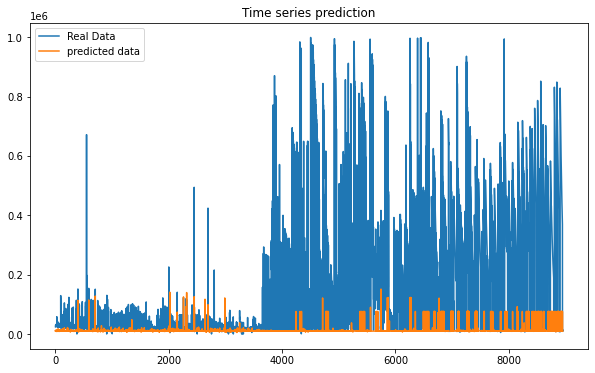

In [99]:

 
#----------------------------------------------아래는 테스트데이터(알고싶은 미래 결과)로 훈련된 모델을 가지고 테스트데이터의 예측결과 값을 구함--------------
# Estimated Value

test_predict = LSTM_Jun(test_x_tensor_final.to(device)) #Forward Pass

predict_data = test_predict.data.detach().cpu().numpy() #numpy conversion

predict_data = minmax.inverse_transform(predict_data) #inverse normalization(Min/Max)

 

# Real Value

real_data = test_y_tensor.data.numpy() # Real value

real_data = minmax.inverse_transform(real_data) #inverse normalization

 

#Figure

plt.figure(figsize = (10,6)) # Plotting

plt.plot(real_data, label = 'Real Data')

plt.plot(predict_data, label = 'predicted data')

plt.title('Time series prediction')

plt.legend()

plt.show() # 먼 미래의 데이터를 예측할 경우, 모델의 성능이 떨어짐을 보여줍니다.

In [83]:
test_p = x.iloc[int(len(df)*Train_ratio):,:]
test_p['predict_data'] = predict_data
test_p = test_p.join(arima_df['item_id'], how='inner')
test_p = test_p.join(arima_df['date'], how='inner')
len(test_p['item_id'].unique())

2919

In [84]:
import numpy as np
mdape = np.abs(np.subtract(real_data, predict_data) / real_data)

In [85]:
test_p['mdape'] = mdape

In [86]:
test_p = test_p[['item_id', 'date', 'mdape']]
test_p = test_p.rename(columns={'item_id':'ID', 'date':'TARGET_DATE', 'mdape':'TARGET'})

In [87]:
test_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 7647 to 23027
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8955 non-null   int64  
 1   TARGET_DATE  8955 non-null   object 
 2   TARGET       8955 non-null   float32
dtypes: float32(1), int64(1), object(1)
memory usage: 244.9+ KB


In [88]:
abc = test_p.groupby(['ID','TARGET_DATE']).aggregate(['median'])
d = abc.reset_index(col_level=1)
d

TARGET
         ID TARGET_DATE    median
0        15  2022-01-02  0.471590
1        15  2022-01-04  0.552660
2        30  2021-12-07  0.428555
3        30  2021-12-28  0.269562
4        52  2021-11-19  0.469146
...     ...         ...       ...
4950  19964  2021-11-29  0.322242
4951  19977  2021-11-30  0.217237
4952  19988  2022-01-13  0.595480
4953  19988  2022-01-19  0.507202
4954  19997  2022-01-03  0.287417

[4955 rows x 3 columns]

In [89]:
d['TARGET'] = d[("TARGET", "median")]
d['ID'] = d[("", 'ID')]
d['TARGET_DATE'] = d[("", 'TARGET_DATE')]             

In [90]:
d = pd.concat([d['TARGET'],d['ID'],d['TARGET_DATE']], axis=1)
d = d[['ID','TARGET_DATE', 'median']]
d = d.rename(columns={'median':'TARGET'})

In [91]:
d['TARGET'] = d['TARGET'].round(1)
result = d.sort_values(by=['TARGET_DATE', 'ID'])

In [100]:
def MdAPE(y_test, y_pred):
	return np.median(np.abs((real_data - predict_data) / real_data))
    
print(f"MdAPE: {MdAPE(real_data, predict_data):.1f}")
#

MdAPE: 0.6


In [93]:
result['TARGET'].value_counts()

0.200000       884
0.300000       802
0.100000       768
0.400000       542
0.500000       428
0.000000       339
1.000000       296
0.600000       271
0.900000       204
0.800000       203
0.700000       199
1.400000         2
1119.599976      1
143.600006       1
2991.199951      1
2442.800049      1
312.100006       1
265.600006       1
290.299988       1
87.800003        1
9.200000         1
6.700000         1
1.900000         1
3.500000         1
5.000000         1
343.600006       1
66.199997        1
1828.500000      1
1.200000         1
Name: TARGET, dtype: int64

In [96]:
result.to_csv('/content/Result.csv', index=False)

학습데이터의 비율을 높이고,  가격 변동폭이 너무 크거나 다른 아이템들 대비 가격 차이가 심할 경우의 아이템들을 필터링 해준 후, epoch을 늘려서 학습시킨다면 더 나은 성능을 보여줄 것으로 기대 되지만 과적합 경우를 경계해야한다.